# Preload precipitation files

Since loading from the original COSMO GRIB files takes quite a long time, I will try to preload them in a separate file. This should hopefully speed up my analysis.

In [19]:
# Imports
import helpers; reload(helpers)
from helpers import *
from config import *
import os
import numpy as np
import datetime as dt
from cosmo_utils.helpers import ddhhmmss, make_timelist, yyyymmddhhmmss_strtotime, yyyymmddhhmmss
import timeit
%matplotlib inline

In [2]:
exp_ids = ['DA_REF', 'DA_PSPv2', 'DA_REF_TL500', 'DA_PSPv2_TL500', 'noDA_PSPv2']
date_start = '20160526000000'
date_stop = '20160608120000'
hint = 12
fclt = 24   # Forecast lead time

In [3]:
date_list = make_timelist(
    yyyymmddhhmmss_strtotime(date_start),
    yyyymmddhhmmss_strtotime(date_stop),
    dt.timedelta(hours=hint),
)

In [4]:
date_list[:5]

[datetime.datetime(2016, 5, 26, 0, 0),
 datetime.datetime(2016, 5, 26, 12, 0),
 datetime.datetime(2016, 5, 27, 0, 0),
 datetime.datetime(2016, 5, 27, 12, 0),
 datetime.datetime(2016, 5, 28, 0, 0)]

## Preload deterministic forecasts

In [5]:
def preload_det_prec_for_one_day(exp_id, date_str, fclt=24):
    data_dir = datadir + exp_id + '/'
    for h in range(1, fclt +1):
        hstr = ddhhmmss(dt.timedelta(hours=h))
        try:
            p = load_det(data_dir, date_str, hstr, return_array=True)
        except Exception:
            print 'File missing:', data_dir, date_str, hstr
            p = np.nan
        if h == 1:  # Allocate output array
            prec = np.ones((fclt, p.shape[0], p.shape[1])) * np.nan
        prec[h - 1] = p
    # Save
    save_fn = savedir_base + exp_id + '/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'det_' +  date_str + '.npy'
    np.save(save_fn, prec)

In [41]:
preload_det_prec_for_one_day('DA_REF', date_start)

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526

## Preload ensemble forecasts

In [34]:
def preload_ens_prec_for_one_day(exp_id, date_str, fclt=24):
    data_dir = datadir + exp_id + '_ens/'
    for h in range(1, fclt +1):
        hstr = ddhhmmss(dt.timedelta(hours=h))
        try:
            p = np.array(load_ens(data_dir, date_str, hstr, return_array=True))
        except Exception:
            print 'File missing:', data_dir, date_str, hstr
            p = np.nan
        if h == 1:  # Allocate output array
            prec = np.ones((fclt, p.shape[0], p.shape[1], p.shape[2])) * np.nan
        prec[h - 1] = p
    # Save
    save_fn = savedir_base + exp_id + '/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'ens_' +  date_str + '.npy'
    np.save(save_fn, prec)

In [47]:
preload_ens_prec_for_one_day('DA_REF', date_start)

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.646483
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.738707
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:06.395695
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.334186
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.423728
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.442428
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.723308
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.542957
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

## Loop over experiments and dates

In [48]:
for exp_id in exp_ids:
    print exp_id
    for date in date_list:
        print date
        date_str = yyyymmddhhmmss(date)
        preload_det_prec_for_one_day(exp_id, date_str)
        preload_ens_prec_for_one_day(exp_id, date_str)

DA_REF
2016-05-26 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/da

reading took 0:00:03.567355
2016-05-26 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160526120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.030199
2016-05-27 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.875127
2016-05-27 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160527120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.095630
2016-05-28 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.311420
2016-05-28 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160528120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.309109
2016-05-29 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.948556
2016-05-29 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160529120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.989397
2016-05-30 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.981403
2016-05-30 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160530120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.017756
2016-05-31 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.996347
2016-05-31 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160531120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.002691
2016-06-01 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.904103
2016-06-01 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160601120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.805495
2016-06-02 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.031978
2016-06-02 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160602120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.610634
2016-06-03 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.306562
2016-06-03 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160603120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.813702
2016-06-04 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.038844
2016-06-04 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160604120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.780473
2016-06-05 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.729045
2016-06-05 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160605120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.121204
2016-06-06 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.013201
2016-06-06 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160606120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.202685
2016-06-07 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.152423
2016-06-07 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160607120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.878058
2016-06-08 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.049550
2016-06-08 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF/20160608120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:04.067686
DA_PSPv2
2016-05-26 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526000000/det/lfff00030000_15
initial path:  

reading took 0:00:03.994446
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.012750
2016-05-26 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160526120000/det/lfff00040000_15
1h earlier:  /project/met

reading took 0:00:03.971041
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.065015
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.201334
2016-05-27 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527000000/det/lfff00020000_15
initial path:  /project/mete

reading took 0:00:03.746199
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.837807
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.819329
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.958891
2016-05-27 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160527120000/det/lfff00030000_15
1h earlier:  /project/meteo/w

reading took 0:00:03.545781
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.755261
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.659080
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.681397
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.803345
2016-05-28 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528000000/det/lfff00010000_15
initial path:  /project/meteo/w2

reading took 0:00:03.958814
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.047457
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.714908
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.838672
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.715020
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.786091
2016-05-28 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160528120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A

reading took 0:00:03.883369
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.853220
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.806493
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.180593
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.915786
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.970999
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.016296
2016-05-29 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160529000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160529000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6

reading took 0:00:03.772863
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.836844
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.828793
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.885362
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.955234
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.784423
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.667577
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.790241
2016-05-29 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2/20160529120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.

reading took 0:00:03.688076
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.761526
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.813158
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.882568
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.784985
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.031101
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.650899
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.890324
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.783817
2016-05-30 00:00:00
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.708932
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.761034
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.930310
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.699718
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.841637
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.793890
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.741101
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.998008
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.835611
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.800147
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.920846
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.110258
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.775878
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.777783
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.919279
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.894992
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.583058
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.996253
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.167756
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.897980
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.819579
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.850699
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.801499
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.906574
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.800914
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.844091
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.708687
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.832108
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.007238
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.908534
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.145507
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.948854
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.701818
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.958027
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.226194
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.014381
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.045713
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.920639
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.082063
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.018682
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.896338
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.074090
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.098252
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.093135
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.907482
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.847697
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.888814
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.863340
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.772469
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.851146
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.905847
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.774611
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.940525
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.834423
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:05.838667
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.161816
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.112579
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.012814
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.837964
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.871154
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.101826
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.744679
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.866731
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.955929
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.933783
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.006806
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.076116
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.006973
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.938297
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.872661
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.964718
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.887131
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.037504
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.599023
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.091917
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.929061
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.843305
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.740757
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.808239
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.931034
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.778761
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.927111
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.944450
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.934660
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.959752
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.827876
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.892987
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.068631
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.880224
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.954772
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.106563
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.993802
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.038337
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.261573
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.112719
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.223168
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.216089
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.171916
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.975892
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.940153
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.915387
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.982763
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.091585
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.918478
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.961084
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.747250
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.233636
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.880469
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:03.916426
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.889790
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.925991
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.872751
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.928943
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.893049
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.987307
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.900015
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.912407
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.490172
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.250632
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.392846
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.310926
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.347310
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.262727
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.981474
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.063096
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.089889
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:05.280444
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.931008
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.053124
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.058603
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.884892
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.128468
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.868873
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.997383
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.055214
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.695464
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.103401
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.446506
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.073126
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.867622
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.990724
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.191769
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.011599
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.685549
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.039814
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.129262
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.969383
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.111695
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.065204
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.175700
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.961151
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.834600
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.207962
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.247579
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.047605
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.011041
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.070081
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.373129
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.161401
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.752455
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.921397
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.029860
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.854055
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.884468
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.978389
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.989987
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.895139
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.765144
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.090262
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.028359
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.069187
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.118392
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.944950
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.242476
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.991997
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526000000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526000000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:05.107879
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.341873
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.404460
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.356127
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.288458
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.458151
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526120000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526120000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526120000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160526120000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:05.589146
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.448375
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.193995
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.273458
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_me

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527000000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.904078
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.881189
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_l

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160527120000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528000000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160528120000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529000000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160529120000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530000000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160530120000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531000000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160531120000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601000000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160601120000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602000000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160602120000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603000000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160603120000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604000000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160604120000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605000000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160605120000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.R

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606000000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.910112
2016-06-06 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160606120000/det/lfff0003

reading took 0:00:03.921294
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.968315
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.940706
2016-06-07 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607000000/det/lfff00020000_15
init

reading took 0:00:03.853325
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.910987
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.139056
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.867885
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.079621
2016-06-07 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160607120000/det/lfff00010000_15
initial path:  /

reading took 0:00:03.696429
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.848027
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.143939
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.275908
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.921278
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.933168
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.723767
2016-06-08 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160608000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_REF_TL500/20160608000000/det/lfff00000000_15
initial path:  /project/mete

reading took 0:00:03.900494
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.912677
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.754827
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.752924
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.645136
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.890923
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.865998
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.877536
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.902806
2016-06-08 12:00:00
initial path:  /project/meteo/w2w/A6/S.R

reading took 0:00:03.744757
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.801707
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.839369
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.791981
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.780242
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.027323
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.103234
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.008096
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.764779
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.383102
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.336726
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.516186
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.443418
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.531613
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.640299
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.448296
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.419905
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.277792
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.090326
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.114166
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.154433
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.233787
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.253854
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.151685
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.091585
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:03.966745
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.163161
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.285705
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.232066
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.106516
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.261323
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.330482
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.161234
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.278142
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.173056
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.463559
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

reading took 0:00:04.191845
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.258472
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.118544
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.118343
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.166065
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.104654
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.025323
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.053731
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.151845
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_arra

read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.852742
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.294373
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.423214
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.164805
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.227220
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.108488
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.221439
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.098822
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
re

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160528120000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160528120000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:05.276512
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.224480
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.167144
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.178945
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.130988
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.333454
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529000000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529000000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529000000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529000000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.847239
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.300975
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.292375
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.243640
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160529120000/det/lfff00230000_15
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.984104
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.288905
read to tmp-file /tmp/user/13098/tmp9okG

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00220000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff01000000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530000000/det/lfff00230000_15
read to tmp-file /tmp/us

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00210000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00230000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160530120000/det/lfff00220000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00200000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00220000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531000000/det/lfff00210000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00190000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00210000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160531120000/det/lfff00200000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00180000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00200000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601000000/det/lfff00190000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00170000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00190000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160601120000/det/lfff00180000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00160000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00180000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602000000/det/lfff00170000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00150000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00170000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160602120000/det/lfff00160000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00140000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00160000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603000000/det/lfff00150000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00130000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00150000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160603120000/det/lfff00140000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00120000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00140000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604000000/det/lfff00130000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00110000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00130000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160604120000/det/lfff00120000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00100000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00120000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605000000/det/lfff00110000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00090000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00110000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160605120000/det/lfff00100000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00080000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00100000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606000000/det/lfff00090000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00070000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00090000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160606120000/det/lfff00080000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00060000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00080000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607000000/det/lfff00070000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00050000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00070000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160607120000/det/lfff00060000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00040000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00060000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608000000/det/lfff00050000_15
initial path:  /project/

initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00040000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00030000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00050000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/DA_PSPv2_TL500/20160608120000/det/lfff00040000_15
initial path:  /project/

reading took 0:00:04.047074
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.162770
noDA_PSPv2
2016-05-26 00:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00030000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00020000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526000000/det/lfff00040000_15


reading took 0:00:04.344571
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.216893
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.593591
read to tmp-file /tmp/user/13098/tmp9okG27fieldobj_list_array_met-ws-720e07_10156.npy
reading took 0:00:04.153214
2016-05-26 12:00:00
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526120000/det/lfff00010000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526120000/det/lfff00000000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526120000/det/lfff00020000_15
1h earlier:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526120000/det/lfff00010000_15
initial path:  /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2/20160526120000/det/lfff00030000_15
1h earlier:  /proje

Exception: Requested member file does not exist:/project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data_forecast/noDA_PSPv2_ens//20160526120000/ens016/lfff00120000_15

Some data is missing for the noDA runs. I built in an exception for these cases in the loading functions where missing files are filled with NaNs.

In [35]:
for date in date_list:
    print date
    date_str = yyyymmddhhmmss(date)
    # preload_det_prec_for_one_day('noDA_PSPv2', date_str)
    preload_ens_prec_for_one_day('noDA_PSPv2', date_str)

2016-05-26 00:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:13.911158
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:02.236207
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:03.271657
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:59.557993
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:58.649855
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:04.582895
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:04.632550
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:01:10.955256
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws

reading took 0:00:08.292067
2016-05-27 12:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:09.308964
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:07.463241
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:10.892490
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:08.458891
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:09.195655
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:08.759373
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:09.214068
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:13.007896
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.896159
2016-05-29 00:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:07.759568
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.096038
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.722349
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.466602
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:08.543023
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.574763
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.072363
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.877764
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:06.002488
2016-05-30 12:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.222371
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.826720
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.748114
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.351639
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.257371
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.206494
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.947052
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.300811
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.705584
2016-06-01 00:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.973616
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.718630
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.599816
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.023462
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.908070
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.846972
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.790927
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.544937
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.631909
2016-06-02 12:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.502418
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.775323
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.123614
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.308651
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.989118
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.818627
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.633071
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.929394
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:05.805586
2016-06-04 00:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:07.159877
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.797529
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.025556
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.932025
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.872361
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.767793
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.652693
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.657247
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.749034
2016-06-05 12:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.445809
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.836590
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.704997
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.788725
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.260407
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.622123
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.350536
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.841436
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.824711
2016-06-07 00:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:06.963390
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.793361
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.720671
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.612150
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.734702
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.998458
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.908194
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.583504
read to tmp-file /tmp/user/13098/tmpYFoK

reading took 0:00:04.649510
2016-06-08 12:00:00
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.500566
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.339279
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.848714
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.918128
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.316873
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.110516
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:04.953171
read to tmp-file /tmp/user/13098/tmpYFoKZKfieldobj_list_array_met-ws-720e07_28141.npy
reading took 0:00:05.049144
read to tmp-file /tmp/user/13098/tmpYFoK

## Preload radar observations

In [13]:
def preload_radar_prec_for_one_day(date_str, fclt=24):
    for h in range(1, fclt +1):
        hstr = ddhhmmss(dt.timedelta(hours=h))
        p = load_radar(date_str, hstr, return_array=True);
        if h == 1:  # Allocate output array
            prec = np.empty((fclt, p.shape[0], p.shape[1]))
        prec[h - 1] = p
    # Save
    save_fn = savedir_base + 'radar/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'radar_' +  date_str + '.npy'
    np.save(save_fn, prec)

In [14]:
preload_radar_prec_for_one_day(date_start)

20160526000000 00010000 1
20160526000000 00020000 2
20160526000000 00030000 3
20160526000000 00040000 4
20160526000000 00050000 5
20160526000000 00060000 6
20160526000000 00070000 7
20160526000000 00080000 8
20160526000000 00090000 9
20160526000000 00100000 10
20160526000000 00110000 11
20160526000000 00120000 12
20160526000000 00130000 13
20160526000000 00140000 14
20160526000000 00150000 15
20160526000000 00160000 16
20160526000000 00170000 17
20160526000000 00180000 18
20160526000000 00190000 19
20160526000000 00200000 20
20160526000000 00210000 21
20160526000000 00220000 22
20160526000000 00230000 23
20160526000000 01000000 24


In [17]:
for date in date_list:
    print date
    date_str = yyyymmddhhmmss(date)
    preload_radar_prec_for_one_day(date_str)

2016-05-26 00:00:00
2016-05-26 12:00:00
2016-05-27 00:00:00
2016-05-27 12:00:00
2016-05-28 00:00:00
2016-05-28 12:00:00
2016-05-29 00:00:00
2016-05-29 12:00:00
2016-05-30 00:00:00
2016-05-30 12:00:00
2016-05-31 00:00:00
2016-05-31 12:00:00
2016-06-01 00:00:00
2016-06-01 12:00:00
2016-06-02 00:00:00
2016-06-02 12:00:00
2016-06-03 00:00:00
2016-06-03 12:00:00
2016-06-04 00:00:00
2016-06-04 12:00:00
2016-06-05 00:00:00
2016-06-05 12:00:00
2016-06-06 00:00:00
2016-06-06 12:00:00
2016-06-07 00:00:00
2016-06-07 12:00:00
2016-06-08 00:00:00
2016-06-08 12:00:00


## Preload EY Product

In [5]:
ey_dir = '/project/meteo/w2w/A6/EY/'

In [33]:
test_fn = ey_dir + '16052923.grib1'

In [34]:
from cosmo_utils.pywgrib import getfobj

In [35]:
pobj = getfobj(test_fn, 'TOT_PREC_S')

In [36]:
pobj

---
 pywgrib-fieldobj 
---
fieldn       = TOT_PREC_S 
fieldn_long  = total precipitation 
unit         = kg/(m**2) 
nz           = 12 
ny           = 461 
nx           = 421 
levs         = [0 0 0 0 0 0 0 0 0 0 0 0] 
drlat        = 0.025 
drlon        = 0.025 
rlats        = -5.0 to 6.5 
rlons        = -5.0 to 5.5 
lats         = 44.7651789042 to 56.200521226 
lons         = 2.9758522667 to 17.7219755705 
mem          = None 
refdate      = None 
leadtime     = None 
gribfn       = /project/meteo/w2w/A6/EY/16052923.grib1 
---

In [37]:
pobj.data.shape

(12, 461, 421)

In [38]:
p = pobj.data

In [39]:
p[p > 1e10] = np.nan

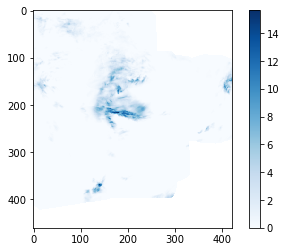

In [40]:
% matplotlib inline
plt.imshow(np.mean(pobj.data, axis=0), cmap='Blues')
plt.colorbar()

In [41]:
def preload_ey_prec_for_one_day(date_obj, fclt=24):
    for h in range(0, fclt):   # Is this correct?
        hour_str = yymmddhhmm(date_obj + dt.timedelta(hours=h))[:-2]
        fn = ey_dir + hour_str + '.grib1'
        p = np.mean(getfobj(fn, 'TOT_PREC_S', return_array=True).data, axis=0)
        if h == 0:  # Allocate output array
            prec = np.empty((fclt, p.shape[0], p.shape[1]))
        prec[h] = p
    # Save
    save_fn = savedir_base + 'ey/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'ey_' +  yyyymmddhhmmss(date_obj) + '.npy'
    np.save(save_fn, prec)

In [42]:
for date in date_list:
    print date
    preload_ey_prec_for_one_day(date)

2016-05-26 00:00:00
2016-05-26 12:00:00
2016-05-27 00:00:00
2016-05-27 12:00:00
2016-05-28 00:00:00
2016-05-28 12:00:00
2016-05-29 00:00:00
2016-05-29 12:00:00
2016-05-30 00:00:00
2016-05-30 12:00:00
2016-05-31 00:00:00
2016-05-31 12:00:00
2016-06-01 00:00:00
2016-06-01 12:00:00
2016-06-02 00:00:00
2016-06-02 12:00:00
2016-06-03 00:00:00
2016-06-03 12:00:00
2016-06-04 00:00:00
2016-06-04 12:00:00
2016-06-05 00:00:00
2016-06-05 12:00:00
2016-06-06 00:00:00
2016-06-06 12:00:00
2016-06-07 00:00:00
2016-06-07 12:00:00
2016-06-08 00:00:00
2016-06-08 12:00:00


In [67]:
a = np.load('/project/meteo/w2w/A6/S.Rasp/kenda_psp_data/save/ey/prec_fields/ey_20160527000000.npy')

In [68]:
type(a)

numpy.ndarray

In [69]:
a.shape

(24, 461, 421)

In [70]:
a

array([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
                      nan,              nan,              nan],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
                      nan,              nan,              nan],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
                      nan,              nan,              nan],
        ..., 
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
                      nan,              nan,              nan],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+0

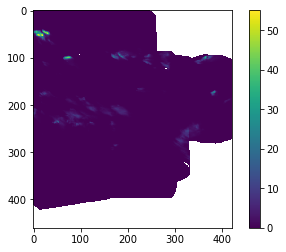

In [64]:
plt.imshow(a[17]/12.)
plt.colorbar()

## Preload CAPE and CIN

In [19]:
def preload_det_cape_cin_for_one_day(exp_id, date_str, fclt=24):
    data_dir = datadir + exp_id + '/'
    for h in range(1, fclt +1):
        hstr = ddhhmmss(dt.timedelta(hours=h))
        ca, ci = load_det_cape_cin(data_dir, date_str, hstr, return_array=True)
        ci[ci < 0] = np.nan
        if h == 1:  # Allocate output array
            cape = np.ones((fclt, ca.shape[0], ca.shape[1])) * np.nan
            cin = np.ones((fclt, ca.shape[0], ca.shape[1])) * np.nan
        cape[h - 1] = ca
        cin[h - 1] = ci
    # Save
    save_fn_cape = savedir_base + exp_id + '/cape_fields/' 
    if not os.path.exists(save_fn_cape):
        os.makedirs(save_fn_cape)
    save_fn_cape += 'det_' +  date_str + '.npy'
    np.save(save_fn_cape, cape)
    save_fn_cin = savedir_base + exp_id + '/cin_fields/' 
    if not os.path.exists(save_fn_cin):
        os.makedirs(save_fn_cin)
    save_fn_cin += 'det_' +  date_str + '.npy'
    np.save(save_fn_cin, cin)

In [20]:
for exp_id in exp_ids:
    print exp_id
    for date in date_list:
        print date
        date_str = yyyymmddhhmmss(date)
        preload_det_cape_cin_for_one_day(exp_id, date_str)

DA_REF
2016-05-26 00:00:00
2016-05-26 12:00:00
2016-05-27 00:00:00
2016-05-27 12:00:00
2016-05-28 00:00:00
2016-05-28 12:00:00
2016-05-29 00:00:00
2016-05-29 12:00:00
2016-05-30 00:00:00
2016-05-30 12:00:00
2016-05-31 00:00:00
2016-05-31 12:00:00
2016-06-01 00:00:00
2016-06-01 12:00:00
2016-06-02 00:00:00
2016-06-02 12:00:00
2016-06-03 00:00:00
2016-06-03 12:00:00
2016-06-04 00:00:00
2016-06-04 12:00:00
2016-06-05 00:00:00
2016-06-05 12:00:00
2016-06-06 00:00:00
2016-06-06 12:00:00
2016-06-07 00:00:00
2016-06-07 12:00:00
2016-06-08 00:00:00
2016-06-08 12:00:00
DA_PSPv2
2016-05-26 00:00:00
2016-05-26 12:00:00
2016-05-27 00:00:00
2016-05-27 12:00:00
2016-05-28 00:00:00
2016-05-28 12:00:00
2016-05-29 00:00:00
2016-05-29 12:00:00
2016-05-30 00:00:00
2016-05-30 12:00:00
2016-05-31 00:00:00
2016-05-31 12:00:00
2016-06-01 00:00:00
2016-06-01 12:00:00
2016-06-02 00:00:00
2016-06-02 12:00:00
2016-06-03 00:00:00
2016-06-03 12:00:00
2016-06-04 00:00:00
2016-06-04 12:00:00
2016-06-05 00:00:00
2016

## Preload deterministic first guess

How are the filest structured:
- Directories are 3 hourly (eg 20160526090000)
- They contain lff_prec.* files from -1 to +1h, which contain the accumulation from 0 to +1h
- but laf files from 0 to +2h

So which is the corresponding radar observation?
- The radar observations for a given hour contain the accumulation from -1 to 0h

So the corresponding radar observation is +1h from the first guess forecast. 

For daily saves the first time step is 0 to 1UTC, which would be saved in the 0UTC file. The last time step is 23 to 24UTC which would be in the 23UTC file


In [5]:
d_shape = (461, 421)

In [15]:
def preload_fg_det_prec_for_one_day(exp_id, date_obj, fclt=24):
    # Get 3hrly storage dir
    date_str = date_str = yyyymmddhhmmss(date_obj)
    for h in range(1, fclt+1):
        td = dt.timedelta(hours=h)
        t = date_obj + td
        date_ana = yyyymmddhhmmss(t)
        date_fg = yyyymmddhhmmss(t - timedelta(hours=1))
        date_store = yyyymmddhhmmss(t - timedelta(hours=t.hour % 3))
        
        ana_dir = (datadir_da + exp_id + '/' + date_store + '/')
        hstr = ddhhmmss(dt.timedelta(hours=h))
        try:
            p = load_det_da(ana_dir, date_fg, return_array=True)
        except Exception:
            print 'File missing:', ana_dir, date_fg
            p = np.nan
        if h == 1:  # Allocate output array
            prec = np.ones((fclt, d_shape[0], d_shape[1])) * np.nan
        prec[h - 1] = p
    # Save
    save_fn = savedir_base + exp_id + '/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'det_da_' +  date_str + '.npy'
    np.save(save_fn, prec)

## Preload ensemble first guess

In [16]:
n_ens_da = 40

In [17]:
def preload_fg_ens_prec_for_one_day(exp_id, date_obj, fclt=24):
    # Get 3hrly storage dir
    date_str = date_str = yyyymmddhhmmss(date_obj)
    for h in range(1, fclt + 1):
        td = dt.timedelta(hours=h)
        t = date_obj + td
        date_ana = yyyymmddhhmmss(t)
        date_fg = yyyymmddhhmmss(t - timedelta(hours=1))
        date_store = yyyymmddhhmmss(t - timedelta(hours=t.hour % 3))
        
        ana_dir = (datadir_da + exp_id + '/' + date_store + '/')
        hstr = ddhhmmss(dt.timedelta(hours=h))
        try:
            p = np.array(load_ens_da(ana_dir, date_fg, return_array=True))
        except Exception:
            print 'File missing:', ana_dir, date_fg
            p = np.nan
        if h == 1:  # Allocate output array
            prec = np.ones((fclt, n_ens_da, d_shape[0], d_shape[1])) * np.nan
        prec[h - 1] = p
    # Save
    save_fn = savedir_base + exp_id + '/prec_fields/' 
    if not os.path.exists(save_fn):
        os.makedirs(save_fn)
    save_fn += 'ens_da_' +  date_str + '.npy'
    np.save(save_fn, prec)

In [18]:
for exp_id in exp_ids[:-1]:
    print exp_id
    for date in date_list[1:]:
        print date
        preload_fg_det_prec_for_one_day(exp_id, date)
        preload_fg_ens_prec_for_one_day(exp_id, date)

DA_REF
2016-05-26 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.985693
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.372433
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.645651
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.591714
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.874699
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.522383
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.380319
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.582863
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-

2016-05-28 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.214899
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.155882
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.954381
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.452733
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.760420
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.000727
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.990775
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.498399
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-29 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.932789
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.651099
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.740372
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.648577
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.760409
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.923483
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.771581
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.826861
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-31 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.296531
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.084285
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.348162
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.843474
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.160886
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.924594
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.135544
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.976433
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-01 12:00:00
File missing: /project/meteo/w2w/A6/S.Rasp/kenda_psp_data/data/DA_REF/20160602000000/ 20160601230000
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.485046
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.704101
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.906446
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.543570
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.052725
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.721976
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.353157
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
rea

reading took 0:00:04.504086
2016-06-03 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.290705
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.292158
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.915264
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.292415
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.027340
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.076554
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.834856
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.130317
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldo

reading took 0:00:05.233952
2016-06-04 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.650011
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.981742
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.078392
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.601652
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.941289
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.773610
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.284863
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.911392
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldo

reading took 0:00:05.267240
2016-06-06 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.244856
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.980779
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.047672
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.211206
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.860809
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.660334
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.739767
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.884127
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldo

reading took 0:00:04.904443
2016-06-07 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.876586
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.182256
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.021326
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.138557
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.020224
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.189428
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.158317
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.202022
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldo

DA_PSPv2
2016-05-26 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.615115
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.349767
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.270278
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.153395
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.085748
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.335988
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.691601
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.781242
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-w

2016-05-28 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.972243
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.034420
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.872800
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.841657
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.929448
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.957820
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.089455
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.853412
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-29 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.700304
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.111726
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.926589
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.743904
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.331994
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.215323
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.212526
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.352251
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-31 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.960428
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.673718
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.861719
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.910016
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.866323
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.622205
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.863793
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.906459
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-01 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.076334
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.951941
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.956066
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.906717
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.975674
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.090623
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.015919
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.916637
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-03 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.236046
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.089419
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.123219
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.074037
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.042891
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.045135
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.452997
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.868268
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-04 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.582453
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.820734
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.896434
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.753193
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.833754
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.738524
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.056932
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.915763
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-06 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.997454
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.682586
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.805871
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.831614
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.941419
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.933040
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.113306
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.875677
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-07 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.357768
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.078979
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.913017
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.158362
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.172395
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.116990
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.018333
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.072576
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

DA_REF_TL500
2016-05-26 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.098566
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.411237
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.592109
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.426216
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.302420
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.798353
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.810072
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.891597
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_m

2016-05-28 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.961455
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.100322
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.133656
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.106879
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.151244
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.492154
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.926231
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.922660
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-29 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.620319
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.013865
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.985156
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.908424
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.313189
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.185138
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.994034
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.129034
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-31 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.020253
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.732384
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.650407
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.884326
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.835015
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.703518
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.065931
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.040181
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-01 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.299781
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.771329
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.685606
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.685289
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.794322
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.871788
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.809229
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.970975
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-03 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.048904
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.843496
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.890711
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.663177
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.635431
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.716706
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.137930
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.873568
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-04 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.068592
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.871493
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.755457
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.906435
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.792479
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.748991
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.862863
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.688690
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-06 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.939442
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.798619
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.829846
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.643058
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.797011
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.583762
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.660514
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.040482
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-07 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.658059
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.813860
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.975468
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.873849
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.621449
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.734036
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.709122
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.818853
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

DA_PSPv2_TL500
2016-05-26 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:05.289182
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.348094
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.553065
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.889258
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.436419
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.378776
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.633408
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.668579
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array

2016-05-28 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.745395
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.068610
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.685850
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.924233
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.002736
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.821670
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.955949
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.702497
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-29 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.017910
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.269744
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.154207
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.165106
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.473957
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.317161
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.074124
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.155415
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-05-31 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.093326
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.780757
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.741205
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.656025
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.748044
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.745718
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.830056
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.799024
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-01 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.124324
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.021654
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.903656
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.889812
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.927684
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.124365
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.882388
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.731874
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-03 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.966152
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.917525
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.608140
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.722451
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.849366
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.977807
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.955100
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.898631
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-04 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.928299
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.729165
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.095980
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.930156
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.854550
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.918709
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.803142
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.005942
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-06 00:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.997738
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.476197
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.563911
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.118084
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.125948
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.397300
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.045207
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.342996
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_

2016-06-07 12:00:00
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.786195
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.902080
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.155629
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.962080
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.949962
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.221924
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:04.090533
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_6316.npy
reading took 0:00:03.973882
read to tmp-file /tmp/user/13098/tmpkE0Y7wfieldobj_list_array_met-ws-720e07_